In [17]:
!pip install qiskit qiskit_aer
!pip install qiskit-ibm-runtime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00


In [9]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


In [10]:
#TASK 1

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    return most

# Test with different secret strings
test_strings = ['1011', '1111', '0000', '1010']

for s in test_strings:
    print(f'\nSecret string s = {s}')
    qc = bernstein_vazirani_circuit(s)
    measured = run_bv(qc)
    measured_reversed = measured[::-1]
    print(f'Measured (reversed): {measured_reversed}')

    if measured_reversed == s:
        print('✅ Match!')
    else:
        print('❌ Mismatch')



Secret string s = 1011
Counts: {'1101': 1024}
Measured (reversed): 1011
✅ Match!

Secret string s = 1111
Counts: {'1111': 1024}
Measured (reversed): 1111
✅ Match!

Secret string s = 0000
Counts: {'0000': 1024}
Measured (reversed): 0000
✅ Match!

Secret string s = 1010
Counts: {'0101': 1024}
Measured (reversed): 1010
✅ Match!


In [11]:
#TASK 2

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s · x ⊕ b."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

    if b == '1':
        qc.x(ancilla)

def bernstein_vazirani_circuit_with_b(s, b):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle_with_b(qc, inputs, ancilla, s, b)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv_with_b(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    return counts

# Test with b = 0 and b = 1
s = '1011'

for b in ['0', '1']:
    print(f'\nTesting: s = {s}, b = {b}')
    qc = bernstein_vazirani_circuit_with_b(s, b)
    print(qc.draw())

    counts = run_bv_with_b(qc)
    print('Counts:', counts)
    plot_histogram(counts, title=f's={s}, b={b}')
    plt.show()

    most = max(counts, key=counts.get)
    measured_reversed = most[::-1]
    print(f'Measured (reversed): {measured_reversed}')
    print(f'Note: b={b} does not affect the measured result for s')


Testing: s = 1011, b = 0
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Measured (reversed): 1011
Note: b=0 does not affect the measured result for s

Testing: s = 1011, b = 1
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫──────────

In [18]:
#TASK 3

# Set up IBM runtime

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="k34-0aexb0tlfWH92G9O0NJPan5KF4RPJJknzCPsT_-W",
    overwrite=True
)

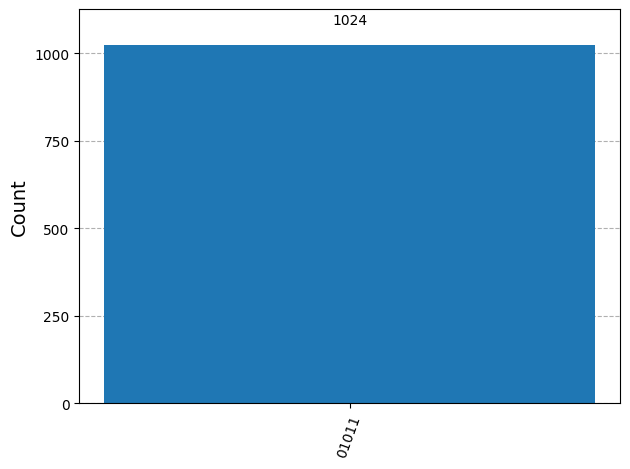

Simulator counts: {'01011': 1024}


qiskit_runtime_service.__init__:WARNING:2025-11-06 17:47:32,061: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-06 17:47:32,436: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-06 17:47:34,478: Using instance: open-instance, plan: open


Running on backend: ibm_fez


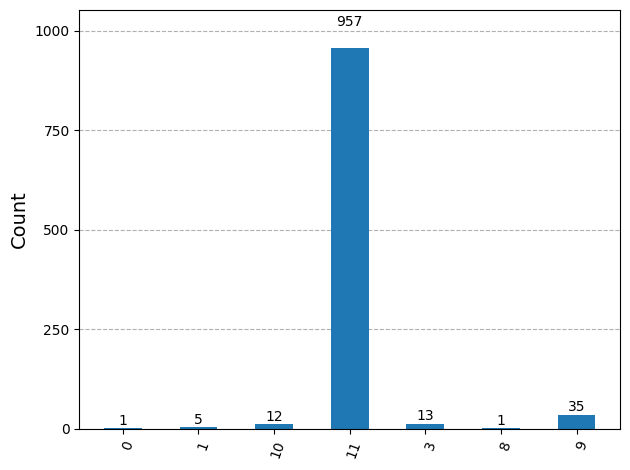

Real device counts: {'11': 957, '9': 35, '10': 12, '1': 5, '3': 13, '0': 1, '8': 1}


In [19]:
s = '11010'
qc = bernstein_vazirani_circuit(s)

sim = AerSimulator()
tqc_sim = transpile(qc, sim)
job_sim = sim.run(tqc_sim, shots=1024)
res_sim = job_sim.result()
counts_sim = res_sim.get_counts()
display(plot_histogram(counts_sim))
print("Simulator counts:", counts_sim)

# --- Real IBM Quantum Execution ---
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.least_busy(operational=True, simulator=False)
print("Running on backend:", backend.name)

tqc_real = transpile(qc, backend=backend, optimization_level=1, translation_method="translator")
sampler = SamplerV2(backend)
job_real = sampler.run([tqc_real], shots=1024)
res_real = job_real.result()

from qiskit.primitives.containers import BitArray

data_block = res_real[0].data
counts_real = {}

if "c" in data_block:
    vals = data_block["c"]
    if isinstance(vals, BitArray):
        samples_list = vals.array.tolist()
        bitstrings = ["".join(str(bit) for bit in sample[::-1]) for sample in samples_list]

        for b in bitstrings:
            counts_real[b] = counts_real.get(b, 0) + 1

    elif isinstance(vals, dict):
        counts_real = {str(k): int(v) for k, v in vals.items()}
elif "counts" in data_block:
    counts_real = {str(k): int(v) for k, v in data_block["counts"].items()}
elif "samples" in data_block:
    samp = data_block["samples"][0]
    counts_real = {str(k): int(round(v * 1024)) for k, v in samp.items()}
elif "quasi_dists" in data_block:
    qd = data_block["quasi_dists"][0]
    counts_real = {str(k): int(round(v * 1024)) for k, v in qd.items()}
else:
    print("Unknown data format:", list(data_block.keys()))

if counts_real:
    display(plot_histogram(counts_real))
    print("Real device counts:", counts_real)
else:
    print("No counts extracted from result:", data_block)

In [12]:
#TASK 4

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def create_noise_model(error_rate):
    noise_model = NoiseModel()
    error_1q = depolarizing_error(error_rate, 1)
    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
    error_2q = depolarizing_error(error_rate * 2, 2)
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
    return noise_model

def run_bv_with_noise(qc, noise_model=None, shots=1024):
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    return counts

# Test with different noise levels
s = '1011'
error_rates = [0.0, 0.01, 0.05, 0.1]
shots = 2048

print(f'Secret string s = {s}\n')

for error_rate in error_rates:
    print(f'Error Rate: {error_rate:.2%}')
    qc = bernstein_vazirani_circuit(s)

    noise_model = None if error_rate == 0.0 else create_noise_model(error_rate)
    counts = run_bv_with_noise(qc, noise_model, shots)

    most = max(counts, key=counts.get)
    measured_reversed = most[::-1]
    success_rate = counts[most] / shots * 100

    print(f'Measured: {measured_reversed}, Success Rate: {success_rate:.1f}%')
    print(f'Top results: {dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:3])}')

    plot_histogram(counts, title=f'Error Rate: {error_rate:.2%}')
    plt.show()
    print()

Secret string s = 1011

Error Rate: 0.00%
Measured: 1011, Success Rate: 100.0%
Top results: {'1101': 2048}

Error Rate: 1.00%
Measured: 1011, Success Rate: 92.4%
Top results: {'1101': 1893, '0101': 40, '1100': 30}

Error Rate: 5.00%
Measured: 1011, Success Rate: 68.3%
Top results: {'1101': 1399, '0101': 168, '1001': 120}

Error Rate: 10.00%
Measured: 1011, Success Rate: 46.8%
Top results: {'1101': 958, '0101': 279, '1001': 186}



In [13]:
#TASK 5

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

print("="*60)
print("BERNSTEIN-VAZIRANI ALGORITHM - STEP BY STEP")
print("="*60)

s = '101'
n = len(s)

print(f"\nSecret string: s = {s}")
print(f"Goal: Recover s using only 1 quantum query\n")

# Step 1: Initialize
print("STEP 1: Initialize qubits")
qreg = QuantumRegister(n + 1, 'q')
creg = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qreg, creg)
qc.x(n)
print("- Input qubits initialized to |0⟩")
print("- Ancilla qubit initialized to |1⟩")
print(qc.draw())

# Step 2: Hadamard gates
print("\nSTEP 2: Apply Hadamard gates to create superposition")
qc.h(qreg)
qc.barrier()
print("- All qubits now in superposition")
print("- Input qubits: equal superposition of all n-bit strings")
print("- Ancilla: in state |-⟩ = (|0⟩-|1⟩)/√2")
print(qc.draw())

# Step 3: Oracle
print("\nSTEP 3: Apply oracle")
print(f"Oracle implements f(x) = s·x where s = {s}")
for i, bit in enumerate(s):
    if bit == '1':
        qc.cx(i, n)
        print(f"- Apply CNOT: q_{i} → ancilla (because s[{i}]=1)")
qc.barrier()
print("- Oracle creates phase kickback based on s·x")
print(qc.draw())

# Step 4: Hadamard again
print("\nSTEP 4: Apply Hadamard to input qubits")
for q in range(n):
    qc.h(q)
print("- Second Hadamard causes interference")
print("- Correct answer (s) amplified, others cancel")
print(qc.draw())

# Step 5: Measure
print("\nSTEP 5: Measure input qubits")
qc.measure(range(n), creg)
print(qc.draw())

# Run circuit
print("\n" + "="*60)
print("EXECUTION")
print("="*60)
sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()

print(f"Counts: {counts}")
plot_histogram(counts, title=f'Results for s={s}')
plt.show()

most = max(counts, key=counts.get)
measured_reversed = most[::-1]

print(f"\nSecret string s: {s}")
print(f"Measured result:  {measured_reversed}")

if measured_reversed == s:
    print("✅ Successfully recovered secret string in 1 query!")
else:
    print("Note: Check bit ordering")

print("\n" + "="*60)
print("KEY POINTS")
print("="*60)
print("1. Classical algorithm needs n queries")
print("2. Quantum algorithm needs only 1 query")
print("3. Uses superposition and interference")
print("4. Result is deterministic (100% success)")

BERNSTEIN-VAZIRANI ALGORITHM - STEP BY STEP

Secret string: s = 101
Goal: Recover s using only 1 quantum query

STEP 1: Initialize qubits
- Input qubits initialized to |0⟩
- Ancilla qubit initialized to |1⟩
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════
          

STEP 2: Apply Hadamard gates to create superposition
- All qubits now in superposition
- Input qubits: equal superposition of all n-bit strings
- Ancilla: in state |-⟩ = (|0⟩-|1⟩)/√2
     ┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_3: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 3/═════════════
                  

STEP 3: Apply oracle
Oracle implements f(x) = s·x where s = 101
- Apply CNOT: q_0 → ancilla (because s[0]=1)
- Apply CNOT: q_2 → ancilla (because s[2]=1)
- Oracle creates phase kickback based on s·x
     ┌───┐      ░            ░ 
q_0: ┤ H ├──────░───■────────░─
     ├───┤     